# Module 8 - LOGISTIC REGRESSION

<i>What is Logistic Regression?</i>

Logistic regression is a type of classifier that is used when you want to make categorical predictions. As compared to linear regression – where we are making continuous value predictions (i.e. price, worth, sales, etc.) – logistic regression is used to making predictions on categories (i.e. yes/no, disease/no disease, survived/did not survive). Through logistic regression you can determine the probability, given your specified features, of a given outcome. 

<i>When would you use Logistic Regression?</i>

- Predicting disease progression by symptoms 
- Credit card approval 
- Predicting the gender of a person by his/her handwriting style
- College admissions by test scores 

The Titanic dataset is a perfect dataset for Logistic Regression because it has a clear target (SURVIVAL) and it has a lot of information about the passengers that survived and did not survive. We are going to use this dataset to train a model that will predict survival of passengers. 

<b>1: Bring in your libraries</b>

In [60]:
# Basics

import pandas as pd
import numpy as np

# Visualization 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Sampling // Classifer // Metrics 

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<b>2: Bring in your data & examine properties of data</b>

In [61]:
location = "../datasets/titanic.xls"

df = pd.read_excel(location)

df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [62]:
## overview of variable information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [63]:
## what do my numeric variables look like?

df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [64]:
# number of rows and number of columns

df.shape

(1309, 14)

In [65]:
# what are all my column names?

df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

<b>3: Explore through visualized data</b>

After you examine the properties of your data, you can explore your data through visualizations. Explore your target (outcome, dependent) variable - binary logistic regression requires your target variable to be binary - having two outcome categories. It may also be useful to explore some of your variables of interest - what is the distribution of numeric variables? How are your categorical variables split between categories? 

Explore the relationships between your target variable and the other variables in your data. This will help you better understand which variables are likely to influence the probability of an outcome. 

How does the rate of survival change based on age, gender, passenger class? If you notice interesting variations on survival rates between categories, that variable may be a good predictor of your target and should be included in your regression model. 

Visually examining your data is also a good way to observe any odd or out of place values. 

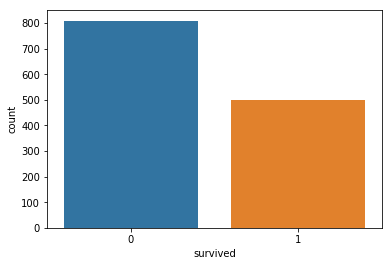

In [66]:
#bar chart of survival status count

sns.countplot(x='survived', data=df)

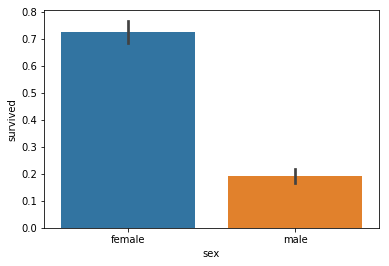

In [67]:
#survival status by sex

sns.barplot('sex', 'survived', data=df)

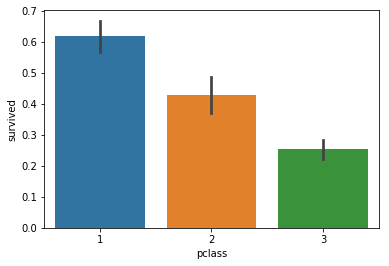

In [68]:
#survival rate by passenger class

sns.barplot('pclass', 'survived', data=df)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


[Text(0.5, 0, 'Age')]

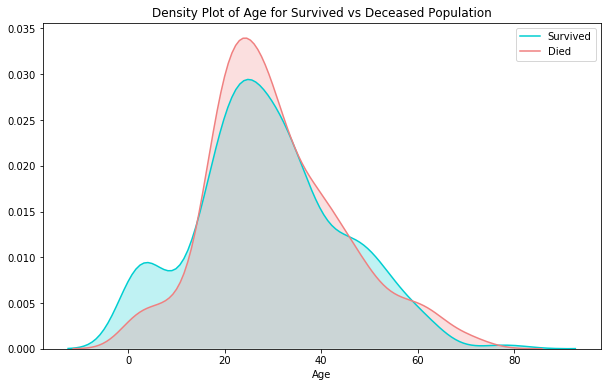

In [69]:
#plot age by survival status

plt.figure(figsize=(10,6))

ax = sns.kdeplot(df['age'][df['survived'] == 1], #passengers that survived
                 color="darkturquoise",
                 shade=True)

sns.kdeplot(df['age'][df['survived'] == 0], #passengers that did not survive
            color="lightcoral",
            shade=True)

plt.legend (['Survived', 'Died'])
plt.title("Density Plot of Age for Survived vs Deceased Population")

ax.set(xlabel='Age')
#plt.show()

<b><i>The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.</i></b>

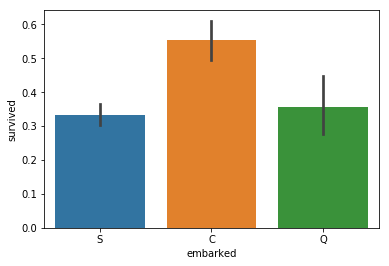

In [70]:
sns.barplot('embarked', 'survived', data=df)

<b>4: Handle Missing Values</b>

When you have a good sense of your data, you should begin to think about what you need to do to prepare your data for analysis. Handling the missing values should be one of your first considerations.  

How you handle missing data is going to depend on which variables are impacted. Blindly dropping all missing values can have major consequences to the quality of your data. If you have a lot of missing data on a variable that you think is important to the analyses - figure out a way to preserve as much data as possible. This usually involes inputting specific values where the data is missing. 

If you have a lot of missing data on a variable that you don't think is important for your model, consider dropping the variable completely. 

In [71]:
#find columns that have missing values

df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<b><i>Let's clean up AGE and EMBARKED. 

BOAT, BODY and HOME DESTINATION all have a lot of missing data but we probably won't be looking at those in our analyses.</i></b>

In [72]:
# lets locate the rows where AGE is missing.
# we're creating a new dataframe that contains these rows

missing_age = df.loc[df['age'].isnull()]
missing_age.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.925,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.550,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.600,NaN,C,NaN,NaN,"Philadelphia, PA"


In [73]:
#get index numbers of missing rows - we'll use this later

mals = list(missing_age.index)

# check against the index numbers above

mals[0:3]

[15, 37, 40]

<i><b>We want to keep AGE in our dataset, and we want to preserve as much of the <b>AGE</b> data as possible. Let's work to replace the missing values in <b>AGE</b> with something meaningful. . .

Let's determine the average age of passengers by SURVIVAL - SEX - PASSENGER CLASS</b></i>

In [74]:
#table of avg age of passenger by survival status, sex, and passenger class
# this will allow us to take into consideration the differences in the distribution of age...

df.groupby(['survived', 'sex', 'pclass'])['age'].mean()

survived  sex     pclass
0         female  1         35.200000
                  2         34.090909
                  3         23.418750
          male    1         43.658163
                  2         33.092593
                  3         26.679598
1         female  1         37.109375
                  2         26.711051
                  3         20.814815
          male    1         36.168240
                  2         17.449274
                  3         22.436441
Name: age, dtype: float64

<b><i>Let's see what the average age would be for the gentleman at index #15 . . .</i></b>
    
    * 1st Class
    * Did not survive
    * Male

<i><b>The avg age for a 1st class man who did not survive is: 43.66</b></i>

In [75]:
# fill the missing values for age based on survival status, sex, and passenger class

df['age'].fillna(df.groupby(['survived', 'sex', 'pclass'])['age'].transform('mean'), inplace=True)

In [76]:
# let's verify that our missing age values have been filled

df.iloc[mals].head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,43.658163,0,0,PC 17318,25.925,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,36.168240,0,0,111427,26.550,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,43.658163,0,0,112379,39.600,NaN,C,NaN,NaN,"Philadelphia, PA"


In [77]:
# let's check our missing values again... 

df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<i><b>EMBARKED has only 2 missing values - it makes the most sense to fill these missing values with the most common embarkation point. Let's follow the same steps we did when we handled the missing values for AGE</b></i>

In [78]:
# located and create a new dataframe with the rows where embarked is missing

embark = df.loc[df['embarked'].isnull()]
embark

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [79]:
# Save index for missing values to verify later

embarkls = list(embark.index)

In [80]:
# let's find out the most common embarkation point

df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [81]:
# Southamptom is the most common point, let's fill out values with "S"
df['embarked'].fillna('S', inplace=True)

# Check that they are filled with the proper value
df.iloc[embarkls]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,6,NaN,"Cincinatti, OH"


In [82]:
df.isnull().sum() 

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

<b>5: Reformat and create new variables</b>

Once you have a sense of the variables you want to include in your model, you should plan to reformat those variables to a format that is acceptable for your analyses.

For logistic regression, all variables included in the model need to be numeric. To convert categorical variables to numeric you will need to create dummy variables. Dummy variables create a category for each value option within a categorical variable. For example - "sex" has two options - MALE and FEMALE. When you create dummy variables you will create two new columns for each option for "sex" - Sex_Male/Sex_Female.

If an individual is Male, they will be coded as "1" under Sex_Male and as "0" under Sex_Female. 

In [83]:
# let's focus only on the variables we want in our analyses

modeldf = df.drop(['name','ticket','fare', 'cabin', 'boat', 'body', 'home.dest'], axis=1)
modeldf.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'embarked'], dtype='object')

<b><i>We need to create dummy variables for our categorical values</i></b>

In [84]:
#dummy variables for passenger class and embarkation port
#get_dummies will auto-drop columns that dummies were created from

modeldf = pd.get_dummies(data=modeldf, columns=['pclass','embarked'])
modeldf.head()

,survived,sex,age,sibsp,parch,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S
0,1,female,29.0000,0,0,1,0,0,0,0,1
1,1,male,0.9167,1,2,1,0,0,0,0,1
2,0,female,2.0000,1,2,1,0,0,0,0,1
3,0,male,30.0000,1,2,1,0,0,0,0,1
4,0,female,25.0000,1,2,1,0,0,0,0,1


In [85]:
# sex is also a categoical variable, but we can easily convert it to a binary variable
# female = 0 // male = 1

modeldf['sex'] = modeldf['sex'].map({'female':0, 'male':1})
modeldf.head()

,survived,sex,age,sibsp,parch,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S
0,1,0,29.0000,0,0,1,0,0,0,0,1
1,1,1,0.9167,1,2,1,0,0,0,0,1
2,0,0,2.0000,1,2,1,0,0,0,0,1
3,0,1,30.0000,1,2,1,0,0,0,0,1
4,0,0,25.0000,1,2,1,0,0,0,0,1


<b><i>Now that we have our variables in the format we want, lets consider creating a few new variables to capture family size</i></b>

In [86]:
#create new column based on number of family members

modeldf['family_num'] = modeldf['sibsp'] + modeldf['parch']

#drop sibsp and parch columns

modeldf.drop(['sibsp', 'parch'], axis=1, inplace=True)
modeldf.head()

,survived,sex,age,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,family_num
0,1,0,29.0000,1,0,0,0,0,1,0
1,1,1,0.9167,1,0,0,0,0,1,3
2,0,0,2.0000,1,0,0,0,0,1,3
3,0,1,30.0000,1,0,0,0,0,1,3
4,0,0,25.0000,1,0,0,0,0,1,3


<b><i>What about those who weren't traveling with any family? Let's parse those individuals out of our dataset</b></i>

In [87]:
modeldf['TravelAlone']=np.where((modeldf['family_num'] > 0), 0, 1)
modeldf.head()

,survived,sex,age,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,family_num,TravelAlone
0,1,0,29.0000,1,0,0,0,0,1,0,1
1,1,1,0.9167,1,0,0,0,0,1,3,0
2,0,0,2.0000,1,0,0,0,0,1,3,0
3,0,1,30.0000,1,0,0,0,0,1,3,0
4,0,0,25.0000,1,0,0,0,0,1,3,0


<b><i>Our dataset is ready for our analyses!</b></i>

<b>6: Logistic Regression</b>

Logistic regression is a type of classification. It is used when you want to make categorical predictions.

The goal of our analyses is to create a model that accurately predicts our target. To get to this point, we are first going to train our model on what we know, then we are going to test our model to see how well it can predict what we may not know. After we train and test our model, we need to assess the performance of the model.  

<b><i>Split Data into Train and Test sets</b></i>

<i>Why split our data?</i>

Wouldn't it be nice if our model could be used to make predictions on the dataset we already have AND make predictions on data it's never seen? 

In order to do this, we need to teach (TRAIN) our model to read the patterns in our data. After understanding the data, the model then should be able to predict outcomes on new data based on the patterns it observed in our training data. To determine the performance of our model, we need to TEST our model on a new dataset and observe the predictions the model made after being trained. 

There are several metrics we can use to test our model performance. 

In [88]:
# step 1: create two seperate datasets - X[all variables EXCEPT target] and y[ONLY target]

y = modeldf['survived']

X = modeldf.drop(['survived'], axis=1)

In [89]:
# step 2: split your data into the training data (80%) and the test data (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [90]:
# step 3: create logistic regression model 

##assign logistic regression function to a variable
LogReg = LogisticRegression()

#fit our model to the TRAINING data
# this is where our model is going to learn our data

LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
#step 4: determine the accuracy score of our model using the training data

LogReg.score(X_train, y_train)

0.7994269340974212

<b><i> How do we measure the performance of our model?</b></i>


<b><i>Confusion Matrix</i></b>

The confusion matrix shows the number of correct classifications along with misclassifications when a model makes predictions for each class. The diagnoal elements are correct classification while the off diagonal elements are misclassifications. There are four possible outcome classes:

1. True positive(TP)— actual = 1, predicted = 1
2. False positive(FP)— actual = 0, predicted = 1
3. False negative(FN)— actual = 1, predicted = 0
4. True negative(TN)— actual = 0, predicted = 0

<b>good breakdown of confusion matrix</b>: https://scaryscientist.blogspot.com/2016/03/confusion-matrix.html?view=classic


<b><i>Accuracy</i></b>

The fraction of predictions that our model got right (i.e. Accuracy: 79.9-Our model correctly predicts outcome nearly 80% of the time).


<b><i>Precision</i></b>

The ratio of true positives (TP) to total predicted positives (TP + FP). Precision score tells how many TP's our model predicted out of total predicted positives (i.e. Precision: 82.1-When our model predicts a passenger as a survivor, it is correct 82% of the time). 


<b><i>Recall/Sensitivity</i></b>

The ratio of true positives (TP) to total actual positives (TP + FN). Recall score basically calculates TP's from total actual positives (i.e. Recall: 71.6 -Our model correctly identifies nearly 72% of all survivors. Another way to say this - it predicts nearly 72% of survivors as survivors).


<b><i>F1 Score</i></b>

When determining how your model performs, you want to consider both the precision and recall. The F1 score is the balanced harmonic mean of recall and precision, giving both metrics equal weight. The higher the F1 score is, the better. 



<b><i>Classification Report</i></b>

The classification report shows us the precision, recall, and F1 score for both outcome classes (i.e. survived/did not survive). 


In [92]:
#step 5: test our model on the TEST data
#we want our model to predict outcomes for the observations in our test data

y_pred = LogReg.predict(X_test)

In [93]:
print(y_pred)

[1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1
 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0
 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1
 0 0 0]


In [94]:
#step 6: determine how well our model predicted values
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival'])

cm

,Predicted Not Survival,Predicted Survival
True Not Survival,139,28
True Survival,28,67


TP - 67

TN - 139

FP - 28

FN - 28

In [95]:
#step 7: determine the accuracy score of our model using the test data

LogReg.score(X_test, y_test)

0.7862595419847328

In [96]:
#step 8: print the classification report to see how our model did across both outcome classes
## compare the actual values with the predicted values

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.83      0.83       167
          1       0.71      0.71      0.71        95

avg / total       0.79      0.79      0.79       262



<b>What can we learn from this report?</b>

# Logistic Regression with Statsmodels

What if we want to predict an outcome and see how each of our variables influence the likelihood of that outcome?

Statsmodels can give us a summary of the variables in our model, and we attempt to identify the various factors that may influence outcome. 

We've already prepared our data, but we need to conduct a few extra steps for statsmodels... 

In [97]:
import statsmodels.formula.api as sm

In [98]:
# we can use our X and y datasets from before, but we need to add an intercept variable to our X 
# logistic regression using statsmodels will not automatically include the intercept

X['intercept'] = 1

X.head(2)

,sex,age,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,family_num,TravelAlone,intercept
0,0,29.0000,1,0,0,0,0,1,0,1,1
1,1,0.9167,1,0,0,0,0,1,3,0,1


In [99]:
# we also want to drop one of our columns for our dummy variables
# the dropped column will be used as a reference column when we're interpreting our variables 

X2 = X.drop(['pclass_1', 'embarked_C'], axis=1)

# I'm choosing the columns that have the highest survival rates

In [ ]:
sns.barplot('pclass', 'survived', data=df)

In [ ]:
sns.barplot('embarked', 'survived', data=df)

In [100]:
X2.head(2)

,sex,age,pclass_2,pclass_3,embarked_Q,embarked_S,family_num,TravelAlone,intercept
0,0,29.0000,0,0,0,1,0,1,1
1,1,0.9167,0,0,0,1,3,0,1


In [101]:
# let's fit our logistic regression model to our X2 and y data

model = sm.Logit(y,X2)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.450203
         Iterations 6


In [102]:
# let's take a look at the summary of our model

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1300
Method:                           MLE   Df Model:                            8
Date:                Sat, 30 Mar 2019   Pseudo R-squ.:                  0.3230
Time:                        14:31:20   Log-Likelihood:                -589.32
converged:                       True   LL-Null:                       -870.51
                                        LLR p-value:                2.829e-116
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
sex            -2.5448      0.161    -15.766      0.000      -2.861      -2.228
age            -0.0444      0.007     -6.581      0.000      -0.058      -0.031
pclass_2       -1.1933      0.229     -5.217      0.000      -1.642      -0.745
pclass_3       -2.1780      0.222     -9.796      0.000      -2.614      -1.742
embarked_Q     -0.5160      0.305     -1.693      0.090      -1.113       0.081
embarked_S     -0.5140      0.189     -2.713      0.007      -0.885      -0.143
family_num     -0.3486      0.082     -4.273      0.000      -0.509      -0.189
TravelAlone    -0.6926      0.223     -3.100      0.002      -1.130      -0.255
intercept       4.8501      0.396     12.256      0.000       4.074       5.626
===============================================================================
"""

In [103]:
#Log Odds

result.params

sex           -2.544756
age           -0.044362
pclass_2      -1.193261
pclass_3      -2.177965
embarked_Q    -0.515950
embarked_S    -0.513954
family_num    -0.348626
TravelAlone   -0.692588
intercept      4.850110
dtype: float64

In [104]:
# Odds Ratios

odds_ratios = np.exp(result.params)

In [105]:
odds_ratios

sex              0.078492
age              0.956608
pclass_2         0.303231
pclass_3         0.113272
embarked_Q       0.596933
embarked_S       0.598126
family_num       0.705657
TravelAlone      0.500279
intercept      127.754451
dtype: float64

Odds ratios < 1 mean a decrease of odds

In [106]:
(odds_ratios - 1)*100

sex              -92.150776
age               -4.339201
pclass_2         -69.676909
pclass_3         -88.672821
embarked_Q       -40.306689
embarked_S       -40.187433
family_num       -29.434284
TravelAlone      -49.972050
intercept      12675.445146
dtype: float64

i.e.

for every one year increase in passenger age, the odds of survival decrease by 4%.